In [26]:
import keras
import keras.layers as layers
from keras.datasets import imdb
import numpy as np
import torchinfo
from pandas import DataFrame

dim = 3000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(cache_dir='imdb/imdb.npz', num_words=dim)

import numpy as np
def vectorize(seq, dim=dim):
    res = np.zeros((len(seq), dim)) # matrika oblike (len(seq), dim)
    for i, s in enumerate(seq):
        res[i, s] = 1.0 # nastavi indekse na 1
    return res

def plot_history(*histories):
    fig, axes = plt.subplots(2, len(histories), sharey='row')
    if axes.ndim < 2:
        axes = axes[:, np.newaxis]
    for i, (h, col) in enumerate(zip(histories, axes.T)):
        history_df = DataFrame(h.history)
        col[0].set_title(f'Model {i + 1}')
        col[1].set_xlabel("epoch")

        plot = history_df[['loss','val_loss']].plot(ax=col[0])
        plot.set_ylabel("loss")
        plot.set_xlabel("epoch")
        plot = history_df[['accuracy','val_accuracy']].plot(ax=col[1])
        plot.set_ylabel("accuracy")
    plt.tight_layout()
    plt.show()

x_train = vectorize(train_data)
y_train = np.asarray(train_labels, dtype=np.float32)

In [14]:
model_v1 = keras.models.Sequential([
    layers.Input((dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])
model_v1.summary()
        

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │        48,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,305 (188.69 KB)

 Trainable params: 48,305 (188.69 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
optimizer_v1 = keras.optimizers.Adam(learning_rate=1e-3)
model_v1.compile(loss='binary_crossentropy', optimizer=optimizer_v1, metrics=['accuracy'])

history_v1 = model_v1.fit(x_train, y_train, epochs=20, validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8428 - loss: 0.3615 - val_accuracy: 0.8784 - val_loss: 0.2995
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9002 - loss: 0.2512 - val_accuracy: 0.8790 - val_loss: 0.2951
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9121 - loss: 0.2167 - val_accuracy: 0.8746 - val_loss: 0.3119
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9258 - loss: 0.1873 - val_accuracy: 0.8724 - val_loss: 0.3209
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9423 - loss: 0.1498 - val_accuracy: 0.8698 - val_loss: 0.3581
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9617 - loss: 0.1084 - val_accuracy: 0.8620 - val_loss: 0.4157
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9752 - loss: 0.0725 - val_accuracy: 0.8574 - val_loss: 0.4995
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9879 - loss: 0.0432 - val_accuracy: 0.

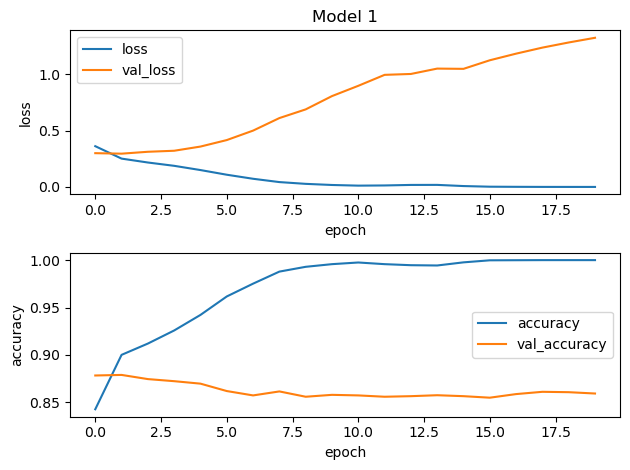

In [24]:
import matplotlib.pyplot as plt
from pandas import DataFrame
    
plot_history(history_v1)

## Odgovori V1.1
Prekomerno prileganje se začne takoj

# V1.2

In [21]:
model_v2 = keras.Sequential([
    layers.Input(shape=(dim,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

optimizer_v2 = keras.optimizers.Adam(learning_rate=1e-3)
model_v2.compile(loss='binary_crossentropy', optimizer=optimizer_v2, metrics=['accuracy'])

history_v2 = model_v2.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8030 - loss: 0.4949 - val_accuracy: 0.8782 - val_loss: 0.4039
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8961 - loss: 0.3458 - val_accuracy: 0.8778 - val_loss: 0.3554
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9147 - loss: 0.2832 - val_accuracy: 0.8742 - val_loss: 0.3520
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9261 - loss: 0.2437 - val_accuracy: 0.8616 - val_loss: 0.3599
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9341 - loss: 0.2144 - val_accuracy: 0.8710 - val_loss: 0.3811
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9442 - loss: 0.1867 - val_accuracy: 0.8694 - val_loss: 0.3976
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9546 - loss: 0.1616 - val_accuracy: 0.8650 - val_loss: 0.4349
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9616 - loss: 0.1422 - val_accuracy: 0.

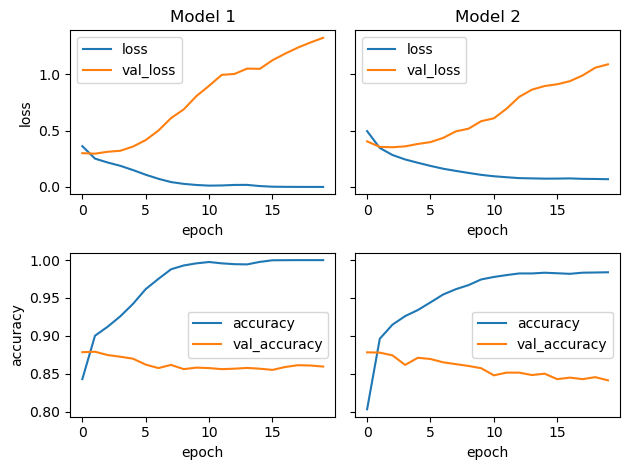

In [27]:
plot_history(history_v1, history_v2)

## V1.2 Odgovori
Prekomerno prileganje se začne v pri 4. epohi, vendar pri višji izgubi kot pri modelu 1. Točnost je nekoliko nižja kot pri modelu 1, izguba nekoliko višja.